In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
sns.set_style("darkgrid")
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [25]:
lm = tf.keras.models.load_model('/content/drive/MyDrive/my_model.keras')

In [18]:
test = pd.read_csv("/content/drive/MyDrive/testmod.csv")

1/1 [==============================] - 4s 4s/step
Mean Absolute Error (MAE): 0.17760752381367167


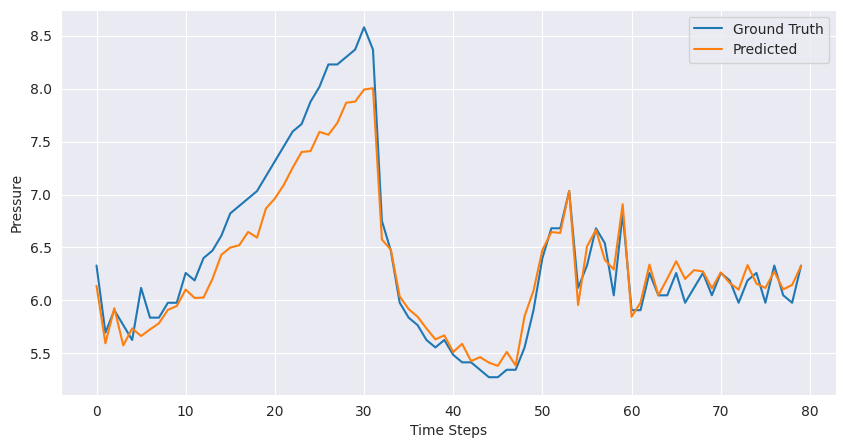

In [26]:
idx = 125680
df_plot = test[test['breath_id'] == idx]  # Use the test data

# Check if df_plot is empty
if df_plot.empty:
    print("No data found for the specified breath_id.")
else:
    # Assuming your model expects input shape (batch_size, n_steps, n_features)
    n_steps = 80  # Adjust this according to your model's input shape
    n_features = 4  # Adjust this according to your model's input shape
    feature_cols = ['R', 'C', 'u_in', 'u_out']  # Adjust these columns

    # Check if the columns exist in df_plot
    if all(col in df_plot.columns for col in feature_cols):
        input_data = df_plot[feature_cols].values.reshape(1, n_steps, n_features)  # Reshape for prediction

        # Make sure your model is compiled before predicting
        lm.compile(optimizer='adam', loss='mae')  # Adjust optimizer and loss

        p =lm.predict(input_data)
        x = range(len(df_plot))  # Use the length of df_plot for x values
        y = df_plot['pressure']

        # Calculate MAE
        mae = mean_absolute_error(y, p[0])

        print(f"Mean Absolute Error (MAE): {mae}")

        # Plot the results
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=x, y=y, label="Ground Truth")
        sns.lineplot(x=x, y=p[0], label="Predicted")  # p[0] because there's only one prediction
        plt.legend()
        plt.ylabel("Pressure")
        plt.xlabel("Time Steps")
        plt.show()
    else:
        print("Some feature columns are missing in the DataFrame.")